In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_json("enem_2023.json")
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


1. Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
# Selecionando apenas as colunas das disciplinas
df_disciplinas = df.drop(columns=['Sexo'])
# Calculando a amplitude de notas para cada disciplina
amplitude_notas = df_disciplinas.max() - df_disciplinas.min()
# Identificando a disciplina com a maior amplitude de nota
disciplina_maior_amplitude = amplitude_notas.idxmax()
print("Disciplina com a maior amplitude de nota:", disciplina_maior_amplitude)

Disciplina com a maior amplitude de nota: Redação


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)


In [ ]:
media_por_disciplina = df.mean()
mediana_por_disciplina = df.dropna().median()

print(media_por_disciplina)
print(mediana_por_disciplina)

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64
Linguagens              517.128831
Ciências humanas        528.503263
Ciências da natureza    502.935209
Matemática              532.961486
Redação                 639.602691
dtype: float64


<ipython-input-18-66f8e232f993>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_por_disciplina = df.mean()
<ipython-input-18-66f8e232f993>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mediana_por_disciplina = df.dropna().median()


In [ ]:
mediana = df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].median(skipna=True)
mediana

Linguagens              517.128831
Ciências humanas        528.503263
Ciências da natureza    502.935209
Matemática              532.961486
Redação                 639.602691
dtype: float64

3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:

a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

In [ ]:
pesos = {
    'Redação': 2,
    'Matemática': 4,
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza': 1
}
df['Nota ponderada'] = sum(df[disciplina] * peso for disciplina, peso in pesos.items())
top_500 = df.nlargest(500, 'Nota ponderada')
media_ponderada = top_500['Nota ponderada'].mean()
desvio_padrao_ponderado = top_500['Nota ponderada'].std()


In [ ]:
desvio_padrao_ponderado

404.3586629946426

In [ ]:
media_ponderada

5572.896772018768

4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?


In [ ]:
variancia = top_500['Nota ponderada'].var()
variancia


163505.92833881496

In [ ]:
media = top_500['Nota ponderada'].mean()
media

5572.896772018768

5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [ ]:
terceiro_quartil_linguagens = df['Linguagens'].quantile(0.75)
np.ceil(terceiro_quartil_linguagens)


573.0

In [ ]:
terceiro_quartil_matematica = df['Matemática'].quantile(0.75)
np.ceil(terceiro_quartil_matematica)

592.0

6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?


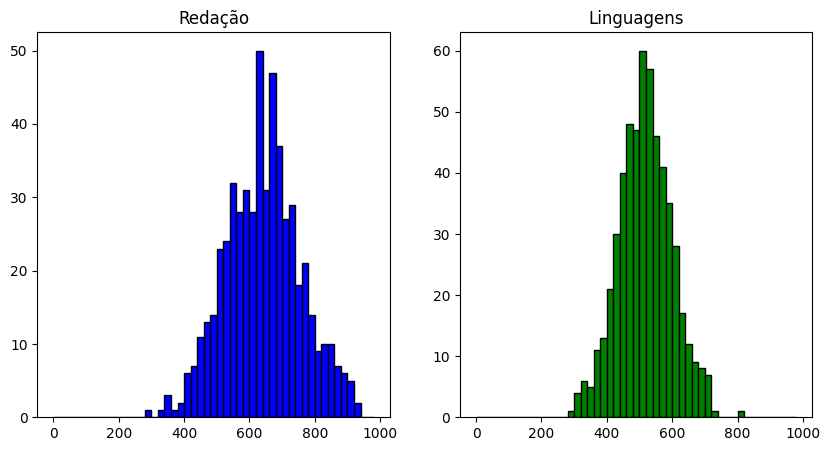

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Redação'].dropna(), bins=np.arange(0, 1000, 20), color='blue', edgecolor='black')
plt.title('Redação')
plt.subplot(1, 2, 2)
plt.hist(df['Linguagens'].dropna(), bins=np.arange(0, 1000, 20), color='green', edgecolor='black')
plt.title('Linguagens')
plt.show()

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])


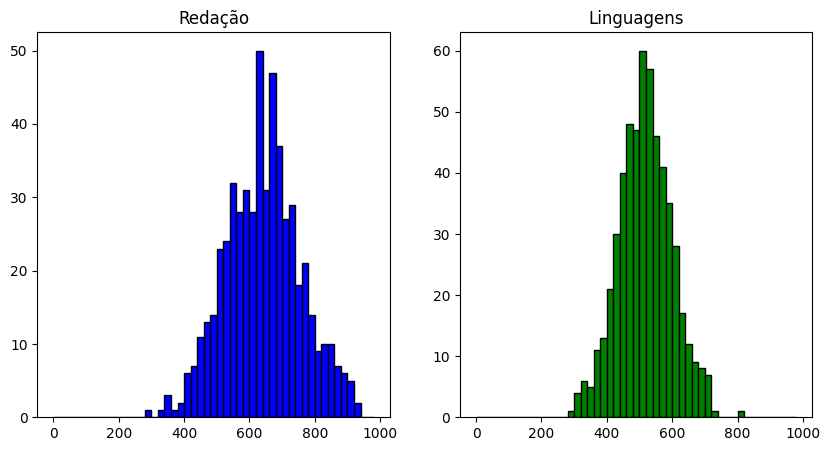

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Redação'].dropna(), bins=np.arange(0, 1000, 20), range=[0, 1000], color='blue', edgecolor='black')
plt.title('Redação')
plt.subplot(1, 2, 2)
plt.hist(df['Linguagens'].dropna(), bins=np.arange(0, 1000, 20), range=[0, 1000], color='green', edgecolor='black')
plt.title('Linguagens')
plt.show()

8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR

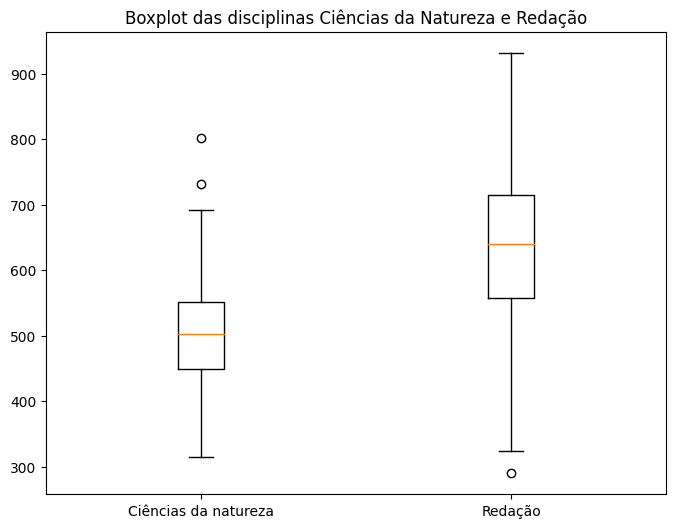

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([df['Ciências da natureza'].dropna(), df['Redação'].dropna()], labels=['Ciências da natureza', 'Redação'])
plt.title('Boxplot das disciplinas Ciências da Natureza e Redação')
plt.show()

9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = ((df < limite_inferior) | (df > limite_superior)).sum()
outliers


<ipython-input-17-d6094ef8bf39>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-17-d6094ef8bf39>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-17-d6094ef8bf39>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < limite_inferior) | (df > limite_superior)).sum()


Ciências da natureza    2
Ciências humanas        3
Linguagens              2
Matemática              3
Nota ponderada          0
Redação                 1
Sexo                    0
dtype: int64

In [ ]:
# Removendo outliers
df_sem_outliers = df[~((df < limite_inferior) | (df > limite_superior)).any(axis=1)]
media_sem_outliers = df_sem_outliers.mean()
# Verificando a alteração na média nacional
diferenca_media = ((media_sem_outliers - media) / media) * 100
diferenca_media

<ipython-input-18-1901acd05528>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_sem_outliers = df[~((df < limite_inferior) | (df > limite_superior)).any(axis=1)]
<ipython-input-18-1901acd05528>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_sem_outliers = df_sem_outliers.mean()


Linguagens             -90.720290
Ciências humanas       -90.528220
Ciências da natureza   -91.007633
Matemática             -90.388039
Redação                -88.506506
Nota ponderada          -1.541602
dtype: float64

10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão

In [ ]:
# Substituindo os valores nulos por média, moda e mediana, respectivamente
filled_mean = df.fillna(df.mean())
filled_mode = df.fillna(df.mode().iloc[0])  # A moda pode ter múltiplos valores, então pegamos apenas o primeiro
filled_median = df.fillna(df.median())

# Calculando a média geral e o desvio padrão em cada caso
mean_with_mean = filled_mean.mean().mean()
std_with_mean = filled_mean.std().mean()

mean_with_mode = filled_mode.mean().mean()
std_with_mode = filled_mode.std().mean()

mean_with_median = filled_median.mean().mean()
std_with_median = filled_median.std().mean()

# Comparando as alterações na média geral e no desvio padrão
diff_mean = {'Média': abs(mean_with_mean - df.mean().mean()),
             'Moda': abs(mean_with_mode - df.mean().mean()),
             'Mediana': abs(mean_with_median - df.mean().mean())}

diff_std = {'Média': abs(std_with_mean - df.std().mean()),
            'Moda': abs(std_with_mode - df.std().mean()),
            'Mediana': abs(std_with_median - df.std().mean())}

# Exibindo os resultados
print(diff_mean)
print(diff_std)

Alteração na média geral:
{'Média': 1.1368683772161603e-13, 'Moda': 27.791598696353617, 'Mediana': 0.09218322316439753}

Alteração no desvio padrão:
{'Média': 5.200789101334976, 'Moda': 25.14968228259599, 'Mediana': 5.198642721590332}


<ipython-input-22-d989a011371c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  filled_mean = df.fillna(df.mean())
<ipython-input-22-d989a011371c>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  filled_median = df.fillna(df.median())
<ipython-input-22-d989a011371c>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence t